<a href="https://colab.research.google.com/github/ssaulrj/codes-python/blob/master/artificial-vision-actumlogos-python/class_four_file_dogs_and_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Damos accesso a nuetro Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Importamos la biblioteca de Keras

import keras
from keras import layers
from keras import models

Using TensorFlow backend.


In [0]:
# Se crea la red neuronal convolucional
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
# Detalles de la red neuronal convolucional 
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
# Se definen los oprtimizadores y la función de perdida
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
# Ubicación de las imagenes, modificarlos 
# de acuerdo a donde este ejecutando el programa

train_dir = "/content/drive/My Drive/perros_gatos_minidataset/train"
validation_dir = "/content/drive/My Drive/perros_gatos_minidataset/validation"
test_dir = "/content/drive/My Drive/perros_gatos_minidataset/test"

In [14]:
from keras.preprocessing.image import ImageDataGenerator

# Todas las imagenes se reescalan
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # Directorio de imagenes de entrenamiento
        train_dir,
        # Las imagenes se les cambia de tamaño a 150x150
        target_size=(150, 150),
        batch_size=20,
        # Clasifición Binaria
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2010 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
# Entrenamiento de la red neuronal convolucional

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 970s 10s/step - loss: 0.6904 - acc: 0.5201 - val_loss: 0.6569 - val_acc: 0.5830
Epoch 2/30
100/100 [==============================] - 13s 130ms/step - loss: 0.6592 - acc: 0.6261 - val_loss: 0.6053 - val_acc: 0.6540
Epoch 3/30
100/100 [==============================] - 13s 128ms/step - loss: 0.6030 - acc: 0.6754 - val_loss: 0.7002 - val_acc: 0.5920
Epoch 4/30
100/100 [==============================] - 13s 129ms/step - loss: 0.5693 - acc: 0.7055 - val_loss: 0.6855 - val_acc: 0.6460
Epoch 5/30
100/100 [==============================] - 13s 129ms/step - loss: 0.5349 - acc: 0.7342 - val_loss: 0.6802 - val_acc: 0.6290
Epoch 6/30
100/100 [==============================] - 13s 130ms/step - loss: 0.5137 - acc: 0.7550 - val_loss: 0.6668 - val_acc: 0.6950
Epoch 7/30
100/100 [==============================] - 14s 136ms/step - loss: 0.4723 - acc: 0.7763 - val_loss: 0.4567 - val_acc: 0.7170
Epoch 8/30
100/100 [==============================] - 13

In [0]:
# Se guarda el modelo 
model.save('perro_gatos_1.h5')

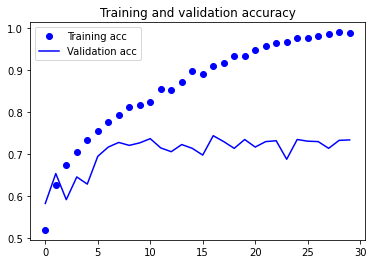

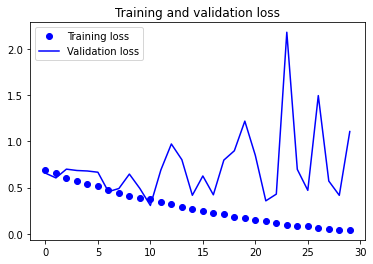

In [17]:
# Resultados del entrenamiento

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# Se define nuevamente el modelo para hacer Data Augmentation
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [20]:
# Se definen los paramétros para el Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Las imagenes de validación no se alteran
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Found 2010 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
50/50 [==============================] - 23s 465ms/step - loss: 0.6963 - acc: 0.5031 - val_loss: 0.6870 - val_acc: 0.5457
Epoch 2/50
50/50 [==============================] - 20s 393ms/step - loss: 0.6922 - acc: 0.5163 - val_loss: 0.6897 - val_acc: 0.5341
Epoch 3/50
50/50 [==============================] - 19s 390ms/step - loss: 0.6837 - acc: 0.5540 - val_loss: 0.6487 - val_acc: 0.5749
Epoch 4/50
50/50 [==============================] - 20s 391ms/step - loss: 0.6747 - acc: 0.5640 - val_loss: 0.6528 - val_acc: 0.5818
Epoch 5/50
50/50 [==============================] - 18s 369ms/step - loss: 0.6652 - acc: 0.5866 - val_loss: 0.6702 - val_acc: 0.5888
Epoch 6/50
50/50 [==============================] - 22s 446ms/step - loss: 0.6558 - acc: 0.5960 - val_loss: 0.6247 - val_acc: 0.6218
Epoch 7/50
50/50 [==============================] - 20s 392ms/step - loss: 0.6496 - acc: 0.6175 - val_loss: 0.6322 - v

In [0]:
model.save('perro_gatos_2.h5')

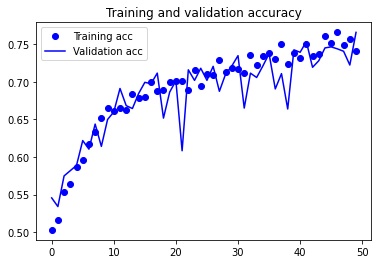

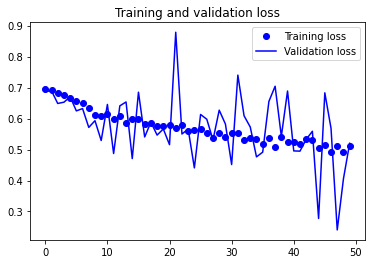

In [23]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
# Se pueba el modelo en el conjunto de prueba

from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

model = load_model('perro_gatos_2.h5')

test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        class_mode='binary')

prediction_probabilities = model.predict_generator(test_generator, verbose=1)
for pred in prediction_probabilities:
  print(pred)

Found 1000 images belonging to 2 classes.
32/32 [==============================] - 386s 12s/step
[0.7666955]
[0.15802161]
[0.744035]
[0.08235446]
[0.10714509]
[0.2712418]
[0.22294413]
[0.59235567]
[0.6990826]
[0.81226456]
[0.17756864]
[0.84366924]
[0.9964222]
[0.7541206]
[0.9138323]
[0.6920154]
[0.13825043]
[0.1170662]
[0.7564189]
[0.16350166]
[0.352638]
[0.27506772]
[0.61996806]
[0.62482697]
[0.40190202]
[0.777212]
[0.6174039]
[0.6988204]
[0.90167975]
[0.59043485]
[0.84352857]
[0.44707808]
[0.85591334]
[0.74382734]
[0.5641299]
[0.38436297]
[0.12883782]
[0.67066586]
[0.22539853]
[0.57530165]
[0.9416266]
[0.9941345]
[0.57775164]
[0.25508747]
[0.43088442]
[0.5505527]
[0.88208437]
[0.27743846]
[0.56054336]
[0.1731569]
[0.2362543]
[0.9257643]
[0.65092194]
[0.6927382]
[0.16607526]
[0.22164242]
[0.17659831]
[0.69251806]
[0.50934607]
[0.35602248]
[0.4517644]
[0.7661592]
[0.8651808]
[0.7754146]
[0.77663463]
[0.39487278]
[0.09261695]
[0.3881659]
[0.2923884]
[0.10006865]
[0.15872358]
[0.60634935

[[1]]
Se trata de un perrito


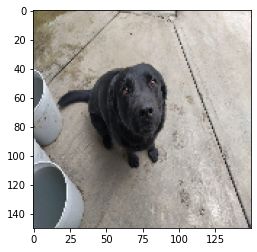

Tiempo total 0.2788989543914795


In [28]:
from keras.models import load_model
import matplotlib.pyplot as plt

model = load_model('perro_gatos_2.h5')

# Se hara la predicción sobre una imagenen
# nunca antes vista por la red
import cv2
import numpy as np
import time 

tic = time.time()
img_ori = cv2.imread('vader.jpeg')
img_ori = cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB)
img = cv2.resize(img_ori, (150, 150), interpolation=cv2.INTER_CUBIC)
imagen_a_probar = np.reshape(img,(1,150, 150, 3))
predictions = model.predict_classes(imagen_a_probar)
print(predictions)
if(predictions == 1):
  print('Se trata de un perrito')
else:
  print('Se trata de un gatito')
plt.imshow(img)
plt.show()
print("Tiempo total {}".format(time.time()-tic))